<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/Week10_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


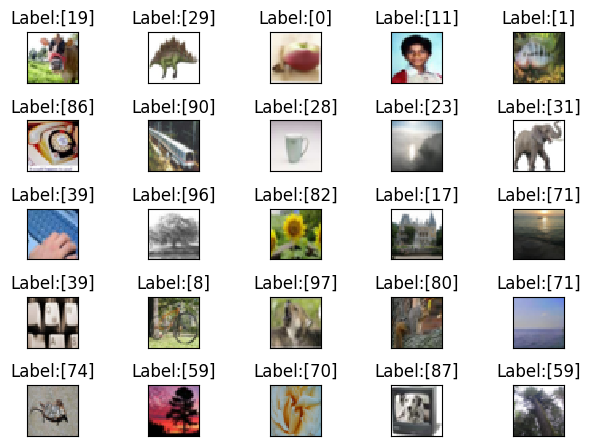

In [3]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

# show 25 random images from the train dataset
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title('Label:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)


In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Loss: ', test_loss)
print('Accuracy: ', test_accuracy)

model.save('cifar100.h5')

Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 4.2802 - accuracy: 0.0646
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 3.8128 - accuracy: 0.1219
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 3.6638 - accuracy: 0.1504
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 3.5722 - accuracy: 0.1662
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 3.4963 - accuracy: 0.1788
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 3.4393 - accuracy: 0.1914
Epoch 7/10
391/391 [==============================] - 13s 34ms/step - loss: 3.4001 - accuracy: 0.1988
Epoch 8/10
391/391 [==============================] - 13s 32ms/step - loss: 3.3563 - accuracy: 0.2064
Epoch 9/10
391/391 [==============================] - 13s 33ms/step - loss: 3.3167 - accuracy: 0.2153
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 3.5417 

In [7]:
# test the model with a custom image
from keras.utils import load_img, img_to_array
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving test_Cat.png to test_Cat (2).png


1/1 [==============================] - 0s 41ms/step - loss: 3.4273 - accuracy: 1.0000
Loss:  3.4273219108581543
Accuracy:  1.0


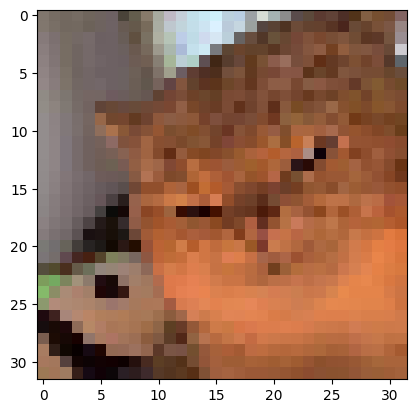

In [11]:
url = 'test_Cat.png'
img = load_img(url, target_size=(32, 32))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32') / 255

#np.argmax(model.predict(img), axis = -1)

# Get the predicted class label for the test image
pred_class = np.argmax(model.predict(img), axis=-1)[0]

# Evaluate the model on the test image
pred_class = model.predict(img)
test_loss, test_accuracy = model.evaluate(img, pred_class.reshape(1, 100))
print('Loss: ', test_loss)
print('Accuracy: ', test_accuracy)